In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
og = pd.read_csv('WineQT.csv')
np.random.seed(0)

In [3]:
data=og.copy()

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [6]:
data.shape

(1143, 13)

In [7]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [8]:
print(data.index)

RangeIndex(start=0, stop=1143, step=1)


In [9]:
print(data.index.duplicated().sum())

0


There is no duplicate or null values

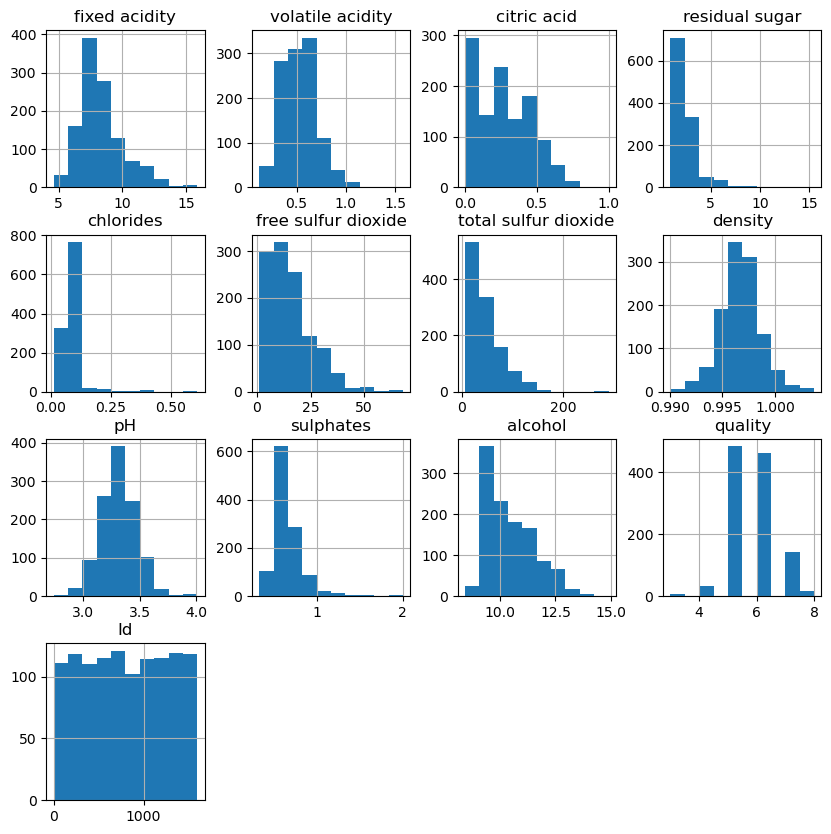

In [11]:
data.hist(figsize=(10, 10))
plt.show()

Correlation matrix

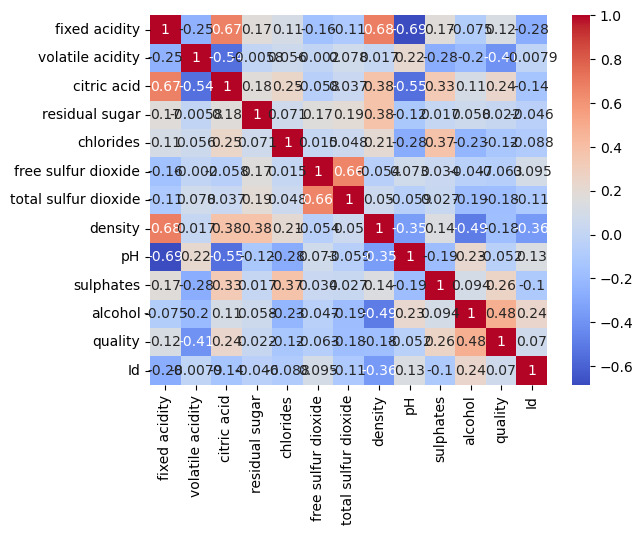

In [13]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Pairplots

In [ ]:
sns.pairplot(data)
plt.show()

Splitting the dataset into the Training set and Test set

In [ ]:
X = data.drop(columns=["quality", "Id"])  # Features (excluding the target 'quality' and 'Id' columns)
y = data["quality"]  # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Scaling

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training the Random Forest Classification model on the Training set

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

Predicting a new result

In [ ]:
new_data = np.array([[7.4, 0.7, 0.0, 1.9, 0.076, 35.0, 137.0, 0.9978, 3.51, 0.56, 10.2]])  # Example data point
new_data_scaled = scaler.transform(new_data)
new_prediction = model.predict(new_data_scaled)
print(f"Predicted quality for new sample: {new_prediction[0]}")

Predicting the Test set results

In [ ]:
y_pred = model.predict(X_test_scaled)

Predicting the test set result

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

In [ ]:
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_scaled[:, 0], y=X_train_scaled[:, 1], hue=y_train, palette="viridis", s=100, edgecolor='k')
plt.title("Training Set Results")
plt.xlabel("Fixed Acidity (scaled)")
plt.ylabel("Volatile Acidity (scaled)")
plt.legend(title="Quality")
plt.show()

In [ ]:
from sklearn.decomposition import PCA

# 1. Applying PCA to reduce the feature space to 2 dimensions for visualization
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled)

# 2. Visualizing the Test set results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_test, palette="viridis", s=100, edgecolor='k')
plt.title("Test Set Results (PCA-reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Quality")
plt.show()


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")